Investigate the distribution of transcript coverage

In [198]:
import os, sys, json
id = "5.0.7/ptr_109_bio2"
processor = "pychopper-edlib"
processor = "nanoprep"
tran_cov_pre = json.load(open(f"outputs/transcript_coverage/sampled_fastq/{id}.json"))
tran_cov_fl = json.load(open(f"outputs/transcript_coverage/{processor}/{id}.fl.json"))
# tran_cov_fu = json.load(open(f"outputs/transcript_coverage/{processor}/{id}.fu.json"))
# tran_cov_tr = json.load(open(f"outputs/transcript_coverage/{processor}/{id}.tr.json"))

<Axes: ylabel='Count'>

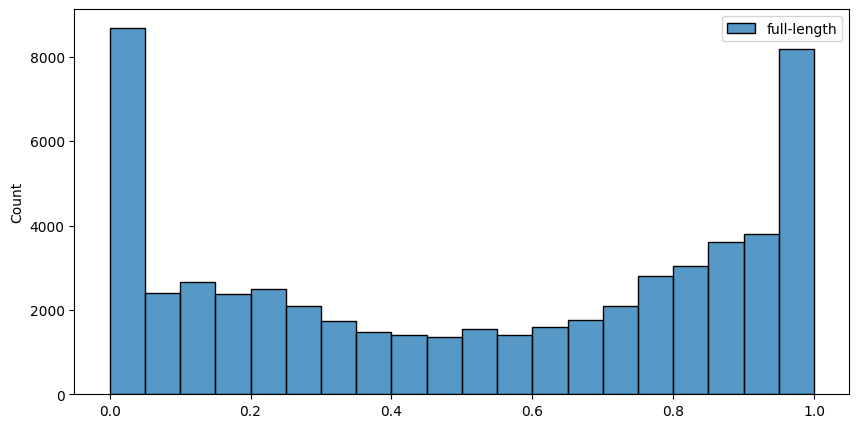

In [199]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))

x1 = [v if v else 0 for k, v in tran_cov_pre.items()] 
cls1 = ["pre"] * len(tran_cov_pre)

x2 =  [v if v else 0 for k, v in tran_cov_fl.items()]
cls2 = ["full-length"] * len(tran_cov_fl)

# x3 =  [v if v else 0 for k, v in tran_cov_fu.items()]
# cls3 = ["fusion"] * len(tran_cov_fu)

# x4 =  [v if v else 0 for k, v in tran_cov_tr.items()]
# cls4 = ["truncated"] * len(tran_cov_tr)

# 
sns.histplot(
    x=x2,
    hue=cls2,
    binwidth=.05,
    multiple="dodge",
    ax=ax
)

In [163]:
len(x2+x3+x4)

100000

In [201]:
len(x3)

10014

In [165]:
len(x1)

100000

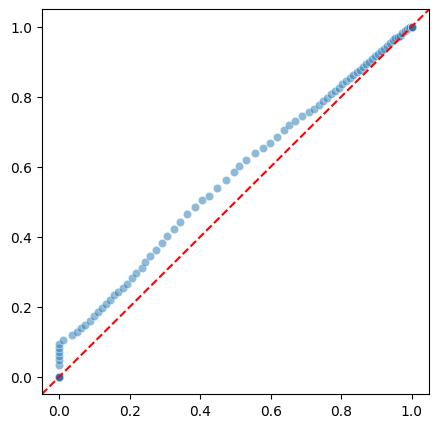

In [202]:
fig, ax = plt.subplots(figsize=(5, 5))
quantiles = np.linspace(0, 1, 100)
sns.scatterplot(
    x=np.quantile(x1, quantiles),
    y=np.quantile(x2, quantiles),
    alpha=.5,
    ax=ax
)
ax.axline((0, 0), slope=1, color="red", ls="--")

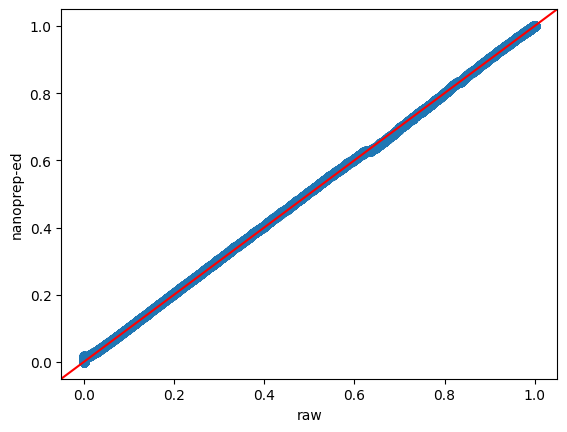

In [184]:
import statsmodels
import numpy as np
fig = statsmodels.graphics.gofplots.qqplot_2samples(
    np.array(x1),
    np.array(x2),
    xlabel="raw",
    ylabel="nanoprep-ed",
    line="45",
    ax=None
)

In [189]:
cutoff = .9
n_full_length_pre = 0
for k, v in tran_cov_pre.items():
    if isinstance(v, float):
        if v >= cutoff:
            n_full_length_pre += 1
percent_full_length_pre = n_full_length_pre / len(tran_cov_pre)

n_full_length_fl = 0
for k, v in tran_cov_fl.items():
    if isinstance(v, float):
        if v >= cutoff:
            n_full_length_fl += 1
percent_full_length_fl = n_full_length_fl / len(tran_cov_fl)

print(f"Percent of read of transcripts coverage >= {cutoff}:")
print(f"Pre-nanoprep: {percent_full_length_pre}")
print(f"Post-nanoprep: {percent_full_length_fl}")

Percent of transcripts with coverage >= 0.9:
Pre-nanoprep: 0.10849
Post-nanoprep: 0.10959246951516247
